In [18]:
import pandas as pd

In [20]:
from scipy.stats import binom

In [25]:
# 美本+美硕(私立)
k, n, p = 0, 6, 0.24

1 - binom.cdf(k, n, p)

0.807300071424

In [26]:
# 美硕(公立)
k, n, p = 0, 6, p + 0.16

1 - binom.cdf(k, n, p)

0.953344

In [5]:
d0 = date(2019, 8, 12)
d1 = date(2022, 3, 28)
delta = d1 - d0
print(delta.days)

959


In [6]:
from datetime import date

d0 = date(2018, 12, 27)
d1 = date(2019, 6, 20)
delta = d1 - d0
print(delta.days)

175


In [7]:
d0 = date(2014, 1, 18)
d1 = date(2014, 2, 5)
delta = d1 - d0
print(delta.days)

18


In [22]:
import scipy.stats as st
import seaborn as sns

In [9]:
st.rv_continuous().rvs(self, loc=0, scale=1, size=1000)

NameError: name 'self' is not defined

In [13]:
import numpy as np

In [46]:
rng = np.random.default_rng(2022) # random seed

In [114]:
pop = np.random.randint(low=0, high=100_000, size=1000)

In [115]:
pop.min(), pop.max()

(49, 99893)

In [118]:
def bootstrap(pop, n, n_trials):
    """bootstrap Sampling n times from the given discrete random varaible X with probabilities P.

    Args:
        X (numpy.ndarray): The discrete random variables.
        n (_type_): Sample Size.
        P (numpy.ndarray): The probabilites of X.
        n_trials (_type_): Number os trials.

    Returns:
        numpy.ndarray: The samples of X.
    """  
    rng = np.random.default_rng(2022) # random seed
    samples = []
    for i in range(n_trials):
        sample = rng.choice(a=pop, size=n, replace=True)
        samples.append(sample)

    return np.array(samples)

In [119]:
n = 30
samples = bootstrap(pop, n, 10000)

In [131]:
samples.mean(), samples.std()

(49205.74131666667, 29608.479591457573)

In [132]:
pop.mean(), pop.std()

(49216.024, 29614.661874676607)

In [136]:
samples.mean(), samples[0].std(), samples[0].std() / np.sqrt(n)

(49205.74131666667, 28924.173933868307, 5280.807506927536)

In [137]:
import handcalcs.render

In [138]:
%%render

a = 2
b = 3
c = 2*a + b/3

<IPython.core.display.Latex object>

In [146]:
n, tstat = 9, -2.83
precision = 3
pval = st.t.cdf(x=tstat, df=n-1)
pval

0.011075105482763959

In [145]:
%%render
pval

<IPython.core.display.Latex object>

In [149]:
%%render

alpha = 0.05
beta = 0.2

<IPython.core.display.Latex object>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

from scipy.special import perm, comb
from statistics import NormalDist
from itertools import permutations, combinations
from fractions import Fraction
from IPython.display import display, Latex

In [4]:
X = np.array([1, 2, 3, 4, 5, 6])
P = np.array([0.4, 0, 0.1, 0.1, 0, 0.4])
E = round(np.sum(X * P), 2) # expected value
E

3.5

In [6]:
def bootstrap(X, n, P, n_trials):
    """bootstrap Sampling n times from the given discrete random varaible X with probabilities P.

    Args:
        X (numpy.ndarray): The discrete random variables.
        n (_type_): Sample Size.
        P (numpy.ndarray): The probabilites of X.
        n_trials (_type_): Number os trials.

    Returns:
        numpy.ndarray: The samples of X.
    """  
    rng = np.random.default_rng(2022) # random seed
    samples = []
    for i in range(n_trials):
        sample = rng.choice(a=X, size=n, replace=True, p=P)
        samples.append(sample)

    return np.array(samples)


def histogram(X, n, P, n_trials):
    """histogram draw histogram with z confidence interval from bootstrap.

    Args:
        X (numpy.ndarray): The discrete random variables.
        n (_type_): Sample Size.
        P (numpy.ndarray): The probabilites of X.
        n_trials (_type_): Number os trials.
    """
    if isinstance(X, list): X = np.array(X)
    if isinstance(P, list): P = np.array(P)
    samples = bootstrap(X=X, n=n, P=P, n_trials=n_trials)
    
    return samples
    
    s_mean = samples.mean()
    s_means = samples.mean(axis=1)
    s_median = np.median(s_means)
    s_std = s_means.std()
    SE = s_std / np.sqrt(n)
    
    precision = 4
    xmin, xmax = st.norm.interval(.95, loc=s_mean, scale=SE)  # 95% percent confidence level
    
    sns.histplot(s_means, stat='probability', kde=True)  # 'probability', 'percent', 'density'
    plt.axvline(x=xmin, linestyle='--', color='orange')
    plt.axvline(x=xmax, linestyle='--', color='orange')
    # plt.axhline(y=0, xmin=0, xmax=5, linewidth=20, color='r')
    plt.title("Sample Distribution of the Sample Mean")
    plt.ylabel("Probability")
    plt.xlabel("Sample Mean")
    display(Latex(f"$E[X] = {round((X * P).sum(), precision)}$, " + "$\mu_{\overline x} = $" + f"${round(s_mean, precision)}$, " + f"$median = {round(s_median, precision)}$"))
    display(Latex(f"$s = {round(s_std, precision)}$, " + "$s_{\overline x} = $" + f"${round(SE, precision)}$"))
    display(Latex(f"$CI = [{round(xmin, precision)}, {round(xmax, precision)}]$"))
    display(Latex(f"$skew = {round(st.skew(s_means), precision)}$, " + f"$kurtosis = {round(st.kurtosis(s_means), precision)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

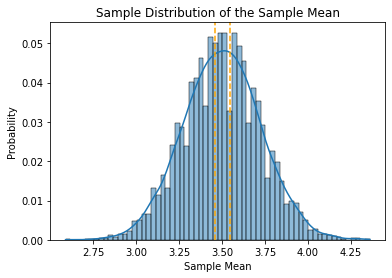

In [5]:
# for n = 100
histogram(X=X, n=100, P=P, n_trials=10000)

In [7]:
samples = histogram(X=X, n=100, P=P, n_trials=10000)

In [12]:
s_mean = samples.mean()
s_means = samples.mean(axis=1)
s_median = np.median(s_means)
s_std = s_means.std()
SE = s_std / np.sqrt(100)

In [9]:
samples.mean(axis=1)

array([3.51, 3.61, 3.57, ..., 3.36, 3.67, 3.33])

In [13]:
s_mean

3.50067

In [14]:
s_means

array([3.51, 3.61, 3.57, ..., 3.36, 3.67, 3.33])

In [15]:
s_median

3.5

In [16]:
s_std

0.22451577027015274

In [17]:
SE

0.022451577027015272

In [18]:
xmin, xmax = st.norm.interval(.95, loc=s_mean, scale=SE)
xmin, xmax

(3.4566657176309232, 3.5446742823690767)

In [19]:
st.norm.interval(.95, loc=s_mean, scale=SE)

(3.4566657176309232, 3.5446742823690767)

In [21]:
CL = .95
st.norm.ppf((1 - CL) / 2 + CL)

1.959963984540054

In [22]:
MOE = 1.96 * SE
MOE

0.04400509097294993

$\displaystyle H_{0}\colon p_{1}=p_{2} \Rightarrow d_0 = 0$

$\displaystyle z={\frac {({\hat {p}}_{1}-{\hat {p}}_{2})}{\sqrt {{\hat {p}}(1-{\hat {p}})({\frac {1}{n_{1}}}+{\frac {1}{n_{2}}})}}}$

$\displaystyle \hat{p}=\frac{x_1 + x_2}{n_1 + n_2}$

### Conditions

- **Random**
- **Normal**
    - $n_1 p_1 > 5$ **and** $n_1(1 − p_1) > 5$
    - $n_2 p_2 > 5$ **and** $n_2(1 − p_2) > 5$
- **Independent**

In [ ]:
def power(p_null, p_alt, n, alpha = .05, plot = True):
    """
    Compute the power of detecting the difference in two populations with 
    different proportion parameters, given a desired alpha rate.
    
    Input parameters:
        p_null: base success rate under null hypothesis
        p_alt : desired success rate to be detected, must be larger than
                p_null
        n     : number of observations made in each group
        alpha : Type-I error rate
        plot  : boolean for whether or not a plot of distributions will be
                created
    
    Output value:
        power : Power to detect the desired difference, under the null.
    """
    
    # Compute the power
    se_null = np.sqrt((p_null * (1-p_null) + p_null * (1-p_null)) / n)
    null_dist = st.norm(loc = 0, scale = se_null)
    p_crit = null_dist.ppf(1 - alpha)
    
    se_alt  = np.sqrt((p_null * (1-p_null) + p_alt  * (1-p_alt) ) / n)
    alt_dist = st.norm(loc = p_alt - p_null, scale = se_alt)
    beta = alt_dist.cdf(p_crit)
    
    return se_null, null_dist, p_crit
    
    if plot:
        # Compute distribution heights
        low_bound = null_dist.ppf(.01)
        high_bound = alt_dist.ppf(.99)
        x = np.linspace(low_bound, high_bound, 201)
        y_null = null_dist.pdf(x)
        y_alt = alt_dist.pdf(x)

        # Plot the distributions
        plt.plot(x, y_null)
        plt.plot(x, y_alt)
        plt.vlines(p_crit, 0, np.amax([null_dist.pdf(p_crit), alt_dist.pdf(p_crit)]),
                   linestyles = '--')
        plt.fill_between(x, y_null, 0, where = (x >= p_crit), alpha = .5)
        plt.fill_between(x, y_alt , 0, where = (x <= p_crit), alpha = .5)
        
        plt.legend(['null','alt'])
        plt.xlabel('difference')
        plt.ylabel('density')
        plt.show()
    
    # return power
    return (1 - beta)
    

In [18]:
import scipy.stats as st
import numpy as np

In [7]:
st.norm(0, 1).ppf(.95)

1.6448536269514722

In [11]:
st.norm(0, 1).cdf(.95) - st.norm(0, 1).cdf(.05)

0.30900506785314574

In [14]:
st.norm.interval(.90)

(-1.6448536269514729, 1.6448536269514722)

In [13]:
st.norm.interval(.95)

(-1.959963984540054, 1.959963984540054)

In [15]:
st.norm.interval(.99)

(-2.5758293035489004, 2.5758293035489004)

In [16]:
st.norm.ppf(.975)

1.959963984540054

In [20]:
# with tstat
n, mu_0, mu_1, sd_1 = 12, 128, 127.2, 2.1
SE = sd_1 / np.sqrt(n)
CL = .95

st.t.interval(CL, df=n-1, loc=mu_0, scale=SE)

(126.66572365661092, 129.33427634338906)

In [21]:
st.t.interval(CL, df=n-1, loc=mu_1, scale=SE)

(125.86572365661092, 128.53427634338908)

In [24]:
from statistics import NormalDist

NormalDist(mu=0, sigma=1).zscore(x=4)

4.0

In [29]:
(128 - 127.2) / SE

1.3196577581477114

In [26]:
n, mu_0, mu_1, sd_1 = 12, 128, 127.2, 2.1
SE = sd_1 / np.sqrt(n)
tstat = (mu_1 - mu_0) / SE
precision = 3
pval = st.t.cdf(x=tstat, df=n-1)
pval

0.10687758177880972

In [27]:
SE

0.6062177826491071

In [28]:
tstat

-1.3196577581477114

In [36]:
from statsmodels.stats import proportion

In [37]:
from statsmodels.stats import proportion_effectsize

ImportError: cannot import name 'proportion_effectsize' from 'statsmodels.stats' (/Users/zacks/.local/share/virtualenvs/statistics-and-probability-vT7xYXHW/lib/python3.9/site-packages/statsmodels/stats/__init__.py)

In [38]:
import statsmodels.stats.api as sms

In [41]:
sms.proportion_effectsize(.12, .10)

0.06398210298605866

In [1]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline

# Some plot styling preferences
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
effect_size = sms.proportion_effectsize(0.12, 0.10)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

3835


In [47]:
def power(p_null, p_alt, n, alpha = .05, plot = True):
    """
    Compute the power of detecting the difference in two populations with 
    different proportion parameters, given a desired alpha rate.
    
    Input parameters:
        p_null: base success rate under null hypothesis
        p_alt : desired success rate to be detected, must be larger than
                p_null
        n     : number of observations made in each group
        alpha : Type-I error rate
        plot  : boolean for whether or not a plot of distributions will be
                created
    
    Output value:
        power : Power to detect the desired difference, under the null.
    """
    
    # Compute the power
    se_null = np.sqrt((p_null * (1-p_null) + p_null * (1-p_null)) / n)
    null_dist = stats.norm(loc = 0, scale = se_null)
    p_crit = null_dist.ppf(1 - alpha)
    
    se_alt  = np.sqrt((p_null * (1-p_null) + p_alt  * (1-p_alt) ) / n)
    alt_dist = stats.norm(loc = p_alt - p_null, scale = se_alt)
    beta = alt_dist.cdf(p_crit)
    
    return p_crit
    
    if plot:
        # Compute distribution heights
        low_bound = null_dist.ppf(.01)
        high_bound = alt_dist.ppf(.99)
        x = np.linspace(low_bound, high_bound, 201)
        y_null = null_dist.pdf(x)
        y_alt = alt_dist.pdf(x)

        # Plot the distributions
        plt.plot(x, y_null)
        plt.plot(x, y_alt)
        plt.vlines(p_crit, 0, np.amax([null_dist.pdf(p_crit), alt_dist.pdf(p_crit)]),
                   linestyles = '--')
        plt.fill_between(x, y_null, 0, where = (x >= p_crit), alpha = .5)
        plt.fill_between(x, y_alt , 0, where = (x <= p_crit), alpha = .5)
        
        plt.legend(['null','alt'])
        plt.xlabel('difference')
        plt.ylabel('density')
        plt.show()
    
    # return power
    return (1 - beta)

power(.1, .12, 1000)

0.022068027137403433

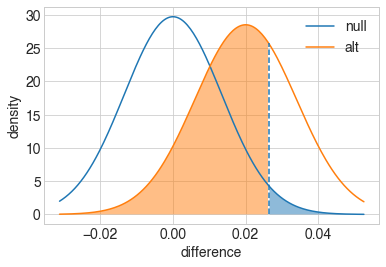

0.3263008797384317

In [156]:
def power(p_null, p_alt, n, alpha=.05, plot=True):
    """
    Compute the power of detecting the difference in two populations with 
    different proportion parameters, given a desired alpha rate.
    
    Input parameters:
        p_null: base success rate under null hypothesis
        p_alt : desired success rate to be detected, must be larger than
                p_null
        n     : number of observations made in each group
        alpha : Type-I error rate
        plot  : boolean for whether or not a plot of distributions will be
                created
    
    Output value:
        power : Power to detect the desired difference, under the null.
    """
    # Unpooled z-test
    CL = 1 - alpha
    
    # Null: there is no difference between two groups. d = 0
    d = 0
    se_null = np.sqrt(st.bernoulli.var(p_null)/n + st.bernoulli.var(p_null)/n)
    null_dist = stats.norm(loc=d, scale=se_null)
    # confidence interval
    ci_null = st.norm(loc=d, scale=se_null).interval(CL)
    ci_null_upp = ci_null[1]
    
    # Alternative: B is at least (p_alt - p_null) better than A. d = p_alt - p_null
    d = p_alt - p_null
    se_alt = np.sqrt(st.bernoulli.var(p_null)/n + st.bernoulli.var(p_alt)/n)
    alt_dist = stats.norm(loc=d, scale=se_alt)
    beta = alt_dist.cdf(ci_null_upp)
    
    if plot:
        # Compute distribution heights
        low_bound = null_dist.ppf(.01)
        high_bound = alt_dist.ppf(.99)
        x = np.linspace(low_bound, high_bound, 201)
        y_null = null_dist.pdf(x)
        y_alt = alt_dist.pdf(x)

        # Plot the distributions
        plt.plot(x, y_null)
        plt.plot(x, y_alt)
        plt.vlines(ci_null_upp, 0, np.amax([null_dist.pdf(ci_null_upp), alt_dist.pdf(ci_null_upp)]),
                   linestyles = '--')
        plt.fill_between(x, y_null, 0, where = (x >= ci_null_upp), alpha = .5)
        plt.fill_between(x, y_alt , 0, where = (x <= ci_null_upp), alpha = .5)
        
        plt.legend(['null','alt'])
        plt.xlabel('difference')
        plt.ylabel('density')
        plt.show()
    
    # return power
    return (1 - beta)

power(.1, .12, 1000)

In [161]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

effect_size = proportion.proportion_effectsize(.12, .1)

NormalIndPower().power(effect_size, nobs1=1000, alpha=.05, ratio=1, alternative='larger')

0.4152071237501345

In [162]:
NormalIndPower().solve_power(effect_size, alpha=.05, power=.8, alternative='larger')

3020.515856462404

In [171]:
def power(p_null, p_alt, n, alpha=.05, plot=True):
    """
    Compute the power of detecting the difference in two populations with 
    different proportion parameters, given a desired alpha rate.
    
    Input parameters:
        p_null: base success rate under null hypothesis
        p_alt : desired success rate to be detected, must be larger than
                p_null
        n     : number of observations made in each group
        alpha : Type-I error rate
        plot  : boolean for whether or not a plot of distributions will be
                created
    
    Output value:
        power : Power to detect the desired difference, under the null.
    """
    # Unpooled z-test
    CL = 1 - alpha
    
    # Null: there is no difference between two groups. d = 0
    d = 0
    se_null = np.sqrt(st.bernoulli.var(p_null)/n + st.bernoulli.var(p_null)/n)
    null_dist = stats.norm(loc=d, scale=se_null)
    # confidence interval
    ci_null = st.norm(loc=d, scale=se_null).interval(CL)
    ci_null_upp = ci_null[1]
    
    # Alternative: B is at least (p_alt - p_null) better than A. d = p_alt - p_null
    d = p_alt - p_null
    se_alt = np.sqrt(st.bernoulli.var(p_null)/n + st.bernoulli.var(p_alt)/n)
    alt_dist = stats.norm(loc=d, scale=se_alt)
    
    # Beta(Type II Error)
    beta = alt_dist.cdf(ci_null_upp)
    
    
    if plot:
        # Compute distribution heights
        low_bound = null_dist.ppf(.01)
        high_bound = alt_dist.ppf(.99)
        x = np.linspace(low_bound, high_bound, 201)
        y_null = null_dist.pdf(x)
        y_alt = alt_dist.pdf(x)

        # Plot the distributions
        plt.plot(x, y_null)
        plt.plot(x, y_alt)
        plt.vlines(ci_null_upp, 0, np.amax([null_dist.pdf(ci_null_upp), alt_dist.pdf(ci_null_upp)]),
                   linestyles = '--')
        plt.fill_between(x, y_null, 0, where = (x >= ci_null_upp), alpha = .5)
        plt.fill_between(x, y_alt , 0, where = (x <= ci_null_upp), alpha = .5)
        
        plt.legend(['null','alt'])
        plt.xlabel('difference')
        plt.ylabel('density')
        plt.show()
    
    # return power
    return (1 - beta)

power(.1, .12, 1000)

0.95

In [173]:
st.norm.interval(.95)

(-1.959963984540054, 1.959963984540054)

In [1]:
import scipy.stats as st

In [3]:
st.binom.cdf(k=)

Signature: st.binom.cdf(k, *args, **kwds)
Docstring:
Cumulative distribution function of the given RV.

Parameters
----------
k : array_like, int
    Quantiles.
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    Location parameter (default=0).

Returns
-------
cdf : ndarray
    Cumulative distribution function evaluated at `k`.
File:      ~/.local/share/virtualenvs/statistics-and-probability-vT7xYXHW/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


In [31]:
k, n, p = 1, 110, 0.007

In [34]:
st.binom.cdf(1, n, p)

0.8198235664722575

In [35]:
1 - st.binom.cdf(0, n, p)

0.5382389100924834

In [20]:
st.binom.pmf(0, n, p)

0.4953644653558523

In [21]:
st.binom.pmf(1, n, p)

0.3491995224059384

In [15]:
st.geom.cdf(100, p)

0.5046355346441473

In [16]:
st.geom.sf(100, p)

0.4953644653558526